In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.stats import norm, lognorm
import gstools as gs
from gstools import SRF, Exponential, Matern, Gaussian

In [149]:
dx = 5
np.linspace(0, 30*dx, 31) + dx/2

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,
        92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5,
       137.5, 142.5, 147.5, 152.5])

In [150]:
arr = np.array([-75.,  -70.,  -65.,  -60.,  -55.,  -50.,  -45.,  -40.,  -35.,  -30.,
                -25.,  -20.,  -15.,  -10.,   -5.,    2.5,   7.5,  12.5,  17.5,  22.5,
                27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,
                77.5,  82.5,  87.5,  92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5,
               127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5,
               177.5, 182.5, 187.5, 192.5, 197.5, 202.5, 207.5, 212.5, 217.5, 222.5,
               227.5])

mean_val = np.median(arr)
print(mean_val)

77.5


In [151]:
def Base_case_extraction(array):
    # Extract unique values
    Vs_unique = np.unique(array)
    Vs1 = Vs_unique[0]
    Vs2 = Vs_unique[1]

    # Extract the height as the number of repetitions of Vs1
    Vs1_count = np.count_nonzero(array == Vs1)
    h = Vs1_count*5
    return Vs1, Vs2, h


def Base_case_plot(Vs1, Vs2, h):
    """ Obtain the array changed to the limits of the model """

    target = np.zeros(151)

    # Fill the array with the values of the base case
    



Vs1: 274.37, Vs2: 1279.26, h: 65
465 (31,) (15,)


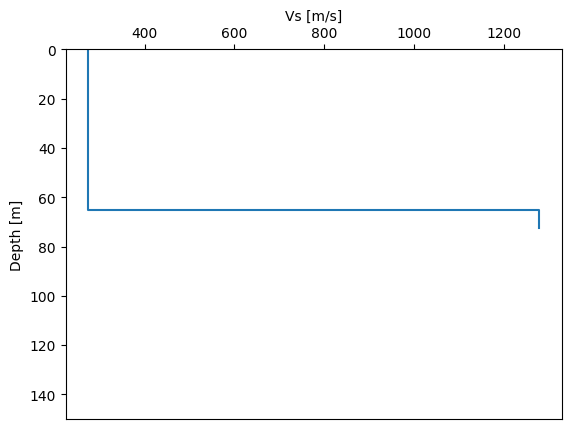

In [ ]:
# Define the base case
Base_Vs=[274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,274.3743743743744,1279.2592592592591]
Base_Vs = np.array(Base_Vs)

Vs1, Vs2, h = Base_case_extraction(Base_Vs)
print(f"Vs1: {Vs1:.2f}, Vs2: {Vs2:.2f}, h: {h:.0f}")

# Defining the geometry
dx = dz = 5
x = np.linspace(0, 30*dx, 30+1) + dx/2
z = np.linspace(0, h+5, int(h/5)+2) + dz/2
print(x.shape[0]*z.shape[0], x.shape, z.shape)

# Plot the base case
fig, ax = plt.subplots()
ax.step([Vs1, Vs2, Vs2], [0, h, z[-1]], where='pre')
ax.set_ylim([0, 150])
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Vs [m/s]')
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

In [153]:
### Interlayer correlation

#freq1 = np.random.uniform(1/60, 1/20)
#freq2 = np.random.uniform(1/20, 1/10)
#freq3 = np.random.uniform(1/10, 1/5)
freq1 = 0.04
freq2 = 0.08
freq3 = 0.102
#offset = np.random.uniform(0, 2*np.pi)
offset = 3.440462781459062


h_factor = 5

print(f"f1: {freq1:.2f}, f2: {freq2:.2f}, f3: {freq3:.2f}, h_factor: {h_factor:.2f}")   

# Create sinusoidal signals
y_add = np.sin(2 * np.pi * freq1 * x + offset) + np.sin(2 * np.pi * freq2 * x+offset) + np.sin(2 * np.pi * freq3 * x+offset)

# Normalize the signal to have a maximum amplitude of 1
y_add_normalized = y_add / np.max(np.abs(y_add))

y_prior = y_add_normalized*h_factor + h


f1: 0.04, f2: 0.08, f3: 0.10, h_factor: 5.00


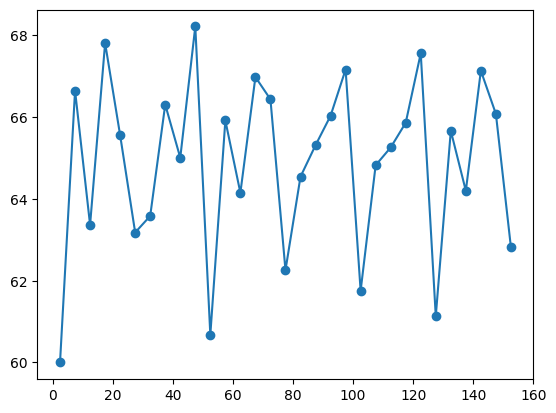

In [154]:
# Interpolate for the middle point 
x_mid = x # We are already considering the middle point
y_mid = y_prior

plt.plot(x, y_prior, label='Prior')
plt.scatter(x_mid, y_mid, label='Midpoint')

(31,)


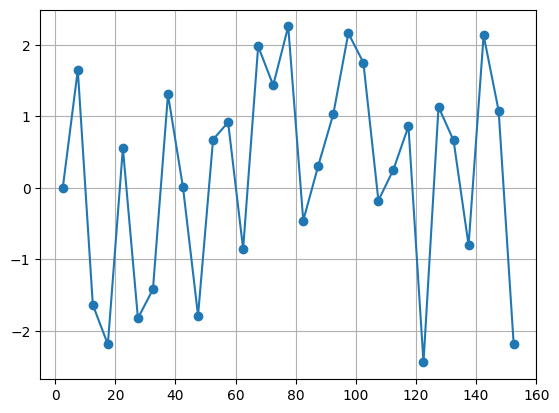

In [155]:
# Find the nearest multiple of 5
mask_post = np.round(y_mid/5)
print(mask_post.shape)

# Calculate the difference between nearest integer and the value
diff = y_mid - mask_post*5
plt.plot(x_mid, diff, marker='o', label='Difference')
plt.grid()

In [156]:
check_Vs1 = np.ones((len(z),len(x)))*110
Vs_A = check_Vs1[mask_post.astype(int),np.arange(len(x_mid))]
print(Vs_A.shape)
result_avg = 5/(diff/Vs_A + (5-diff)/Vs2)

(31,)


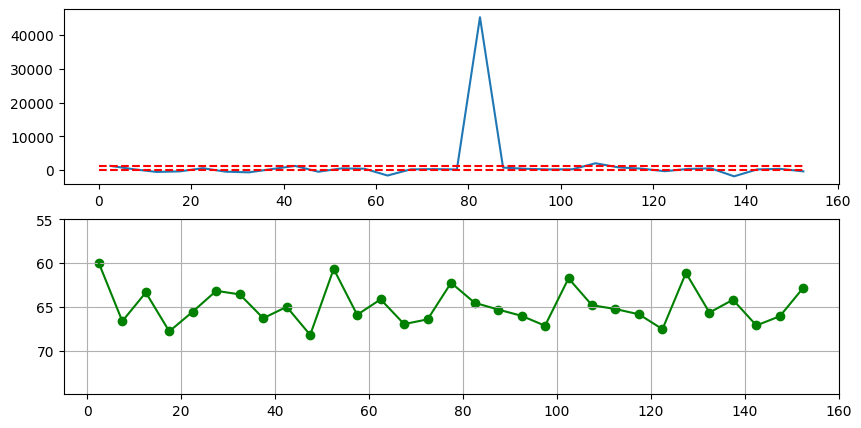

In [157]:

fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(x_mid,result_avg)
ax[0].hlines(110, 0, x[-1], color="red", linestyle="--")
ax[0].hlines(Vs2, 0, x[-1], color="red", linestyle="--")

ax[1].plot(x,y_prior, c="green")
ax[1].scatter(x_mid, y_mid, c="green")
ax[1].set_yticks(np.arange(0, z[-1], 5))
ax[1].grid(True, which='both')
ax[1].set_ylim([55,75])
ax[1].invert_yaxis()

In [158]:
## Statistics used for the simulation

### Base model
COV = 0.3 # For the soil layer
std_Vs1 = Vs1*COV

### Correlation length
rH = 50
aHV = 10

In [159]:
# Create a meshgrid and flatten it
X, Z = np.meshgrid(x, z)
X = X.flatten()
Z = Z.flatten()

# Vectorized computation of pairwise differences
tau_x = np.abs(X[:, None] - X[None, :])
tau_z = np.abs(Z[:, None] - Z[None, :])

# Compute rho in one go
rho = np.exp(-2 * (tau_x / rH + tau_z / (rH / aHV)))

In [160]:
L = np.linalg.cholesky(rho)

G = L @ np.random.normal(0, 1, len(X))

## Log Normal
psi = np.sqrt(np.log(1+COV**2))
lamb = np.log(Vs1) - 0.5*psi**2

Z_Vs = np.exp(lamb + psi*G)

## Truncated the values
z_max = np.exp(lamb + psi*2)
z_min = np.exp(lamb - psi*2)

Z_Vs[Z_Vs > z_max] = z_max
Z_Vs[Z_Vs < z_min] = z_min
print(f"Mean: {np.mean(Z_Vs):.2f}, Std: {np.std(Z_Vs):.2f}")
print(f"Min: {np.min(Z_Vs):.2f}, Max: {np.max(Z_Vs):.2f}")

Mean: 263.26, Std: 77.99
Min: 146.10, Max: 472.73


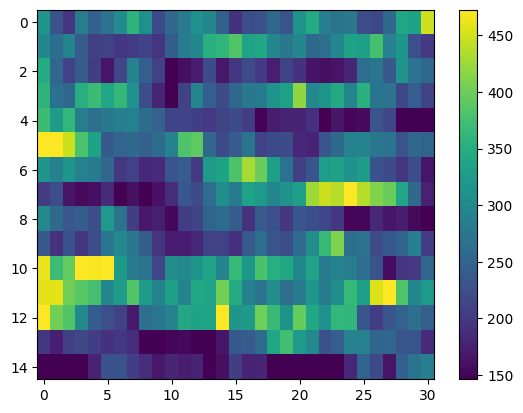

In [161]:
plt.imshow(Z_Vs.reshape(len(z), len(x)), aspect='auto')
plt.colorbar()

In [162]:
np.arange(-(max_elements_per_side)*dx+X[0], 0, dx)

array([-82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5, -42.5,
       -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5])

In [163]:
max_elements_per_side = 3 
A = np.concatenate([np.arange(-(max_elements_per_side)*dx+x[0], 0, dx), x, np.arange(x[-1]+dx, x[-1]+(max_elements_per_side+1)*dx, dx)])

In [164]:
A

array([-12.5,  -7.5,  -2.5,   2.5,   7.5,  12.5,  17.5,  22.5,  27.5,
        32.5,  37.5,  42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,
        77.5,  82.5,  87.5,  92.5,  97.5, 102.5, 107.5, 112.5, 117.5,
       122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5,
       167.5])

In [165]:
A.shape

(37,)

In [166]:
# If we consider no intralayer variability

#Z_Vs = np.ones_like(Z_Vs)*Vs1
#Z_Vs = Z_Vs.reshape(len(z), len(x))

## Plot
#fig, ax = plt.subplots()
#plt.imshow(Z_Vs.reshape(len(z), len(x)), aspect='auto')
#plt.colorbar()

# If we consider no interlayer variability
#Z_Vs_masked = Z_Vs.reshape(len(z), len(x))

#mask = z <= h

#Z_Vs_masked[~mask] = Vs2
#plt.imshow(Z_Vs.reshape(len(z), len(x)), aspect='auto')
#plt.colorbar()

In [167]:
Z_Vs = Z_Vs.reshape(len(z), len(x))
height, width = Z_Vs.shape
scale_factor = 5
print(f"height: {height}, width: {width}")
# Create an array of row indices with shape (height, 1)
y_indices = np.arange(height)[:, np.newaxis]  * scale_factor

# Broadcast and compute the mask: True if row index is less than the corresponding y_prior value.
mask = y_indices < y_prior[np.newaxis, :]

# Recalculate with the diff the last values
Vs_A = Z_Vs[mask_post.astype(int),np.arange(len(x_mid))]
result_avg = 5/(diff/Vs_A + (5-diff)/Vs2)

# Add this to Z_Vs
Z_Vs[mask_post.astype(int),np.arange(len(x_mid))] = result_avg

# Now mask Z_Vs: assign a fill value (e.g. np.nan) outside the allowed region.
Z_Vs_masked = np.where(mask, Z_Vs, np.nan)

height: 15, width: 31


Text(0.5, 1.0, 'Realization: CV: 0.3, rH: 50 \n aHV: 10 h_scale: 5')

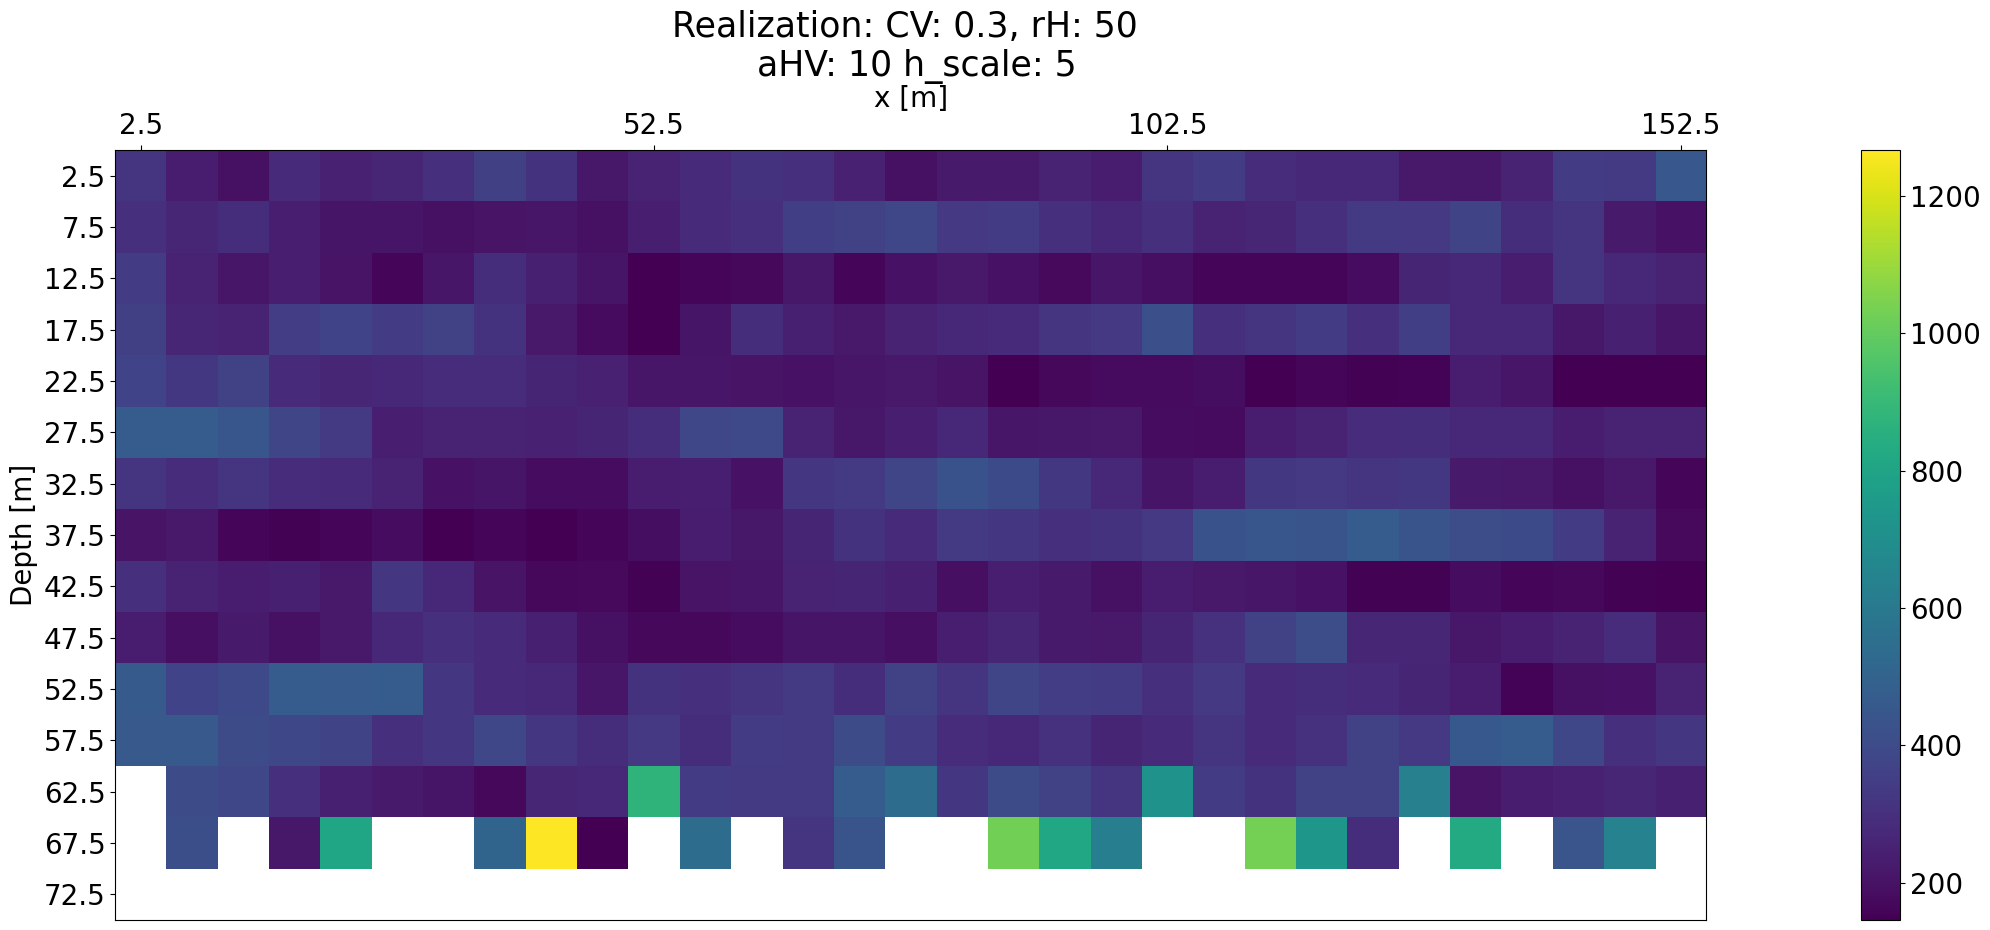

In [168]:
fig, ax = plt.subplots(figsize=(40, 10))    
im = ax.imshow(Z_Vs_masked)

# Set the ticks as x and z for x and y axis respectively
ax.set_xticks(np.arange(0, len(x), 10))
ax.set_yticks(np.arange(0, len(z), 1))
ax.set_xticklabels(x[::10], fontsize=20)
ax.set_yticklabels(z[::1], fontsize=20)


ax.set_ylabel('Depth [m]', fontsize=20)
ax.set_xlabel('x [m]', fontsize=20)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=20)
# Add title
plt.title(f"Realization: CV: {COV}, rH: {rH} \n aHV: {aHV} h_scale: {h_factor}", fontsize=25)

In [169]:
Z_Vs_masked.shape

(15, 31)

In [170]:
# Let's extract the first and last column
first_column = Z_Vs_masked[:, 0]
last_column = Z_Vs_masked[:, -1]
nx = Z_Vs_masked.shape[1]
nz = Z_Vs_masked.shape[0]
print("Before:", x.shape)

# Calculate the number of elements to add
max_elements_per_side = np.floor((1000 - nx*nz)/Z_Vs_masked.shape[0]/2)

# Copy the columns
Z_Vs_masked_2 = np.concatenate([np.repeat(first_column[:, np.newaxis], max_elements_per_side, axis=1), Z_Vs_masked, np.repeat(last_column[:, np.newaxis], max_elements_per_side, axis=1)], axis=1)
x = np.concatenate([np.arange(-(max_elements_per_side)*dx+x[0], 0, dx), x, np.arange(x[-1]+dx, x[-1]+(max_elements_per_side+1)*dx, dx)])
print("After:" , x.shape)
# New grid
X, Z = np.meshgrid(x, z)

Before: (31,)
After: (65,)


In [171]:
X.shape, Z.shape, Z_Vs_masked_2.shape

((15, 65), (15, 65), (15, 65))

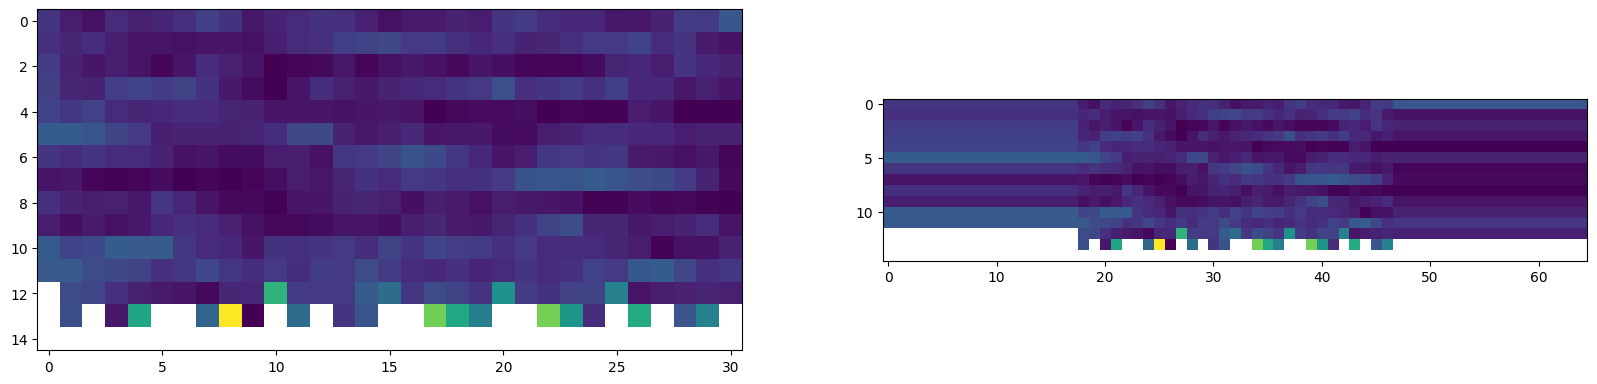

In [172]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(Z_Vs_masked)
ax[1].imshow(Z_Vs_masked_2)

In [98]:
## Create a 2D array, of ones until row 13, and then nan
#Z_Vs_masked = np.ones((len(z), len(x)))*Vs1
#Z_Vs_masked[int(h/5):, :] = np.nan

# Fill nan with Vs2
#Z_Vs_masked = np.where(np.isnan(Z_Vs_masked), Vs2, Z_Vs_masked)


#fig, ax = plt.subplots(figsize=(20, 10))    
#im = ax.imshow(Z_Vs_masked)
# Change the x and y labels with the scale factor
#ax.set_xticks(np.arange(0, len(x), 1))
#ax.set_yticks(np.arange(0, len(z), 1))
#ax.set_xticklabels(x[::1], fontsize=20)
#ax.set_yticklabels(z[::1], fontsize=20)
#ax.set_ylabel('Depth [m]', fontsize=20)
#ax.set_xlabel('x [m]', fontsize=20)
#ax.xaxis.tick_top()
#ax.xaxis.set_label_position('top')
# Add a colorbar
#fig.colorbar(im, ax=ax)

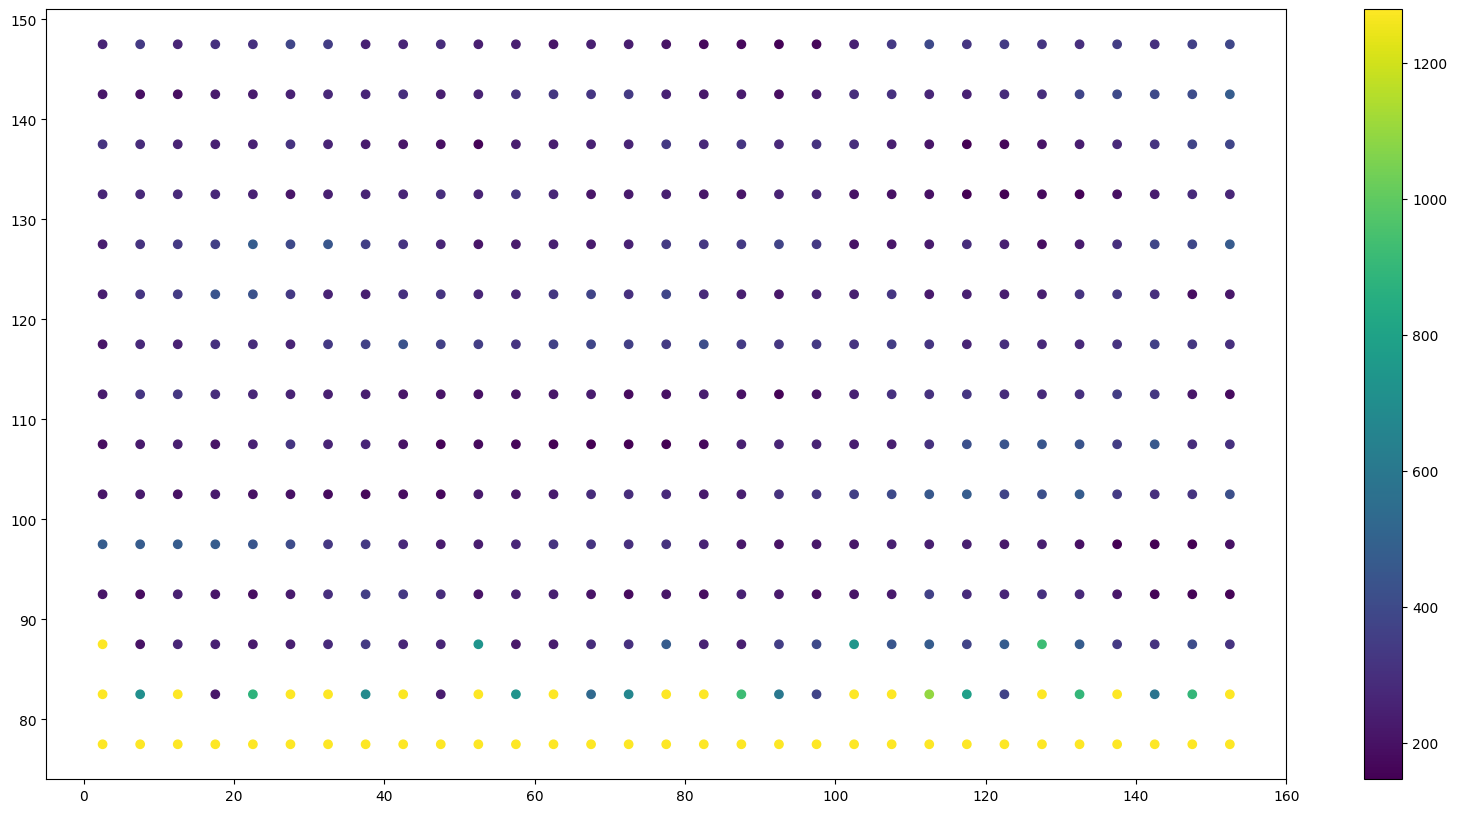

In [99]:
# Calculate the centroids
X_centroids = X
Z_centroids = 150 - Z ## Inverting the Z axis

# Fill nan with Vs2
Vs = np.where(np.isnan(Z_Vs_masked), Vs2, Z_Vs_masked)

# Flatten the Vs array
Vs = Vs.flatten()

# Plot
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(X_centroids, Z_centroids, c=Vs, cmap='viridis')
plt.colorbar()

In [100]:
# Writing function

def writing_FLAC(Z_Vs_masked, Vs2, X, Z, rho=2000, nu=0.3, dx=dx, dz=dz, file_dr="FLAC/", suffix=""):
    """
    This function writes the files:
    Coord2D-XY.dat
    Density2D.dat
    MatProp2D.dat
    """

    # Calculate the centroids
    X_centroids = X
    Z_centroids = Z.max() - Z + dz/2 ## Inverting the Z axis

    # Fill nan with Vs2
    Vs = np.where(np.isnan(Z_Vs_masked), Vs2, Z_Vs_masked)

    # Flatten the Vs array
    Vs = Vs.flatten()

    # Write Coord2D-XY.dat
    with open(file_dr+'Coord2D-XY'+suffix+'.dat', 'w') as f:
        f.write("X-Y Coordinates of Zones' Centroids\n")
        f.write(f"{Vs.shape[0]:d} 0.0\n")
        for x, z in zip(X_centroids, Z_centroids):
            f.write(f"{x:f} {z:f}\n")

    # Write Density2D.dat
    with open(file_dr+'Density2D'+suffix+'.dat', 'w') as f:
        f.write("Vs and Density of the material\n")
        f.write(f"{Vs.shape[0]:d} 0.0\n")
        for vs in Vs:
            f.write(f"{vs:f} {rho:f}\n")

    # Write MatProp2D.dat
    with open(file_dr+'MatProp2D'+suffix+'.dat', 'w') as f:
        f.write("Vs and Nu of the material\n")
        f.write(f"{Vs.shape[0]:d} 0.0\n")
        for vs in Vs:
            f.write(f"{vs:f} {nu:.4e}\n")



In [101]:
writing_FLAC(Z_Vs_masked, Vs2, X, Z, suffix="_both")

In [102]:
def write_geometry2d(x_array=x, z_array=z, file_dir="FLAC/", suffix="",dx=dx, dz=dz):
    content = f"""model new
model configure dynamic
zone create quad size {(x_array.shape[0]):d} {(z_array.shape[0]):d} point 0 (0,0) point 1 ({x_array.max()+dx/2:.0f},0) point 2 (0,{z_array.max()+dz/2:.0f})
zone cmodel assign elastic
;------------------------------------------------
;--------Define the material properties-----------
;------------------------------------------------
table '10' import 'Coord2D-XY{suffix}.dat'
table '20' import 'MatProp2D{suffix}.dat'
table '21' import 'Density2D{suffix}.dat'
fish define soilprop
    mtot = table.size(10)
    loop m (1,mtot)
        xi = table.x(10,m)
        yi = table.y(10,m)
        csi = table.x(20,m)
        nui = table.y(20,m)
        rho = table.y(21,m)
        shmodi = rho*csi^2
        bkmodi = 2*shmodi*(1+nui)/3/(1-2*nui)
        dout = string(m)+ ',  ' + string(csi) + ',  ' + string(nui)
        dum = io.out(dout)
        ; 
        zcent = vector(xi,yi)
        zp = zone.near(zcent)
        zone.density(zp) = rho
        zone.prop(zp,'shear') = shmodi
        zone.prop(zp,'bulk') = bkmodi
        ; 
    endloop
end
@soilprop
; ------------------------------------------------
model save 'Model_4b_Geom.sav'
"""
    with open(file_dir + 'Geometry2D.dat', 'w') as f:
        f.write(content)


write_geometry2d(suffix="_both")


In [103]:
def write_analysis_case4b(Vs_b=Vs2, x_array=x, z_array=z, file_dir="FLAC/", suffix="", dz=dz, dx=dx):
    content = f""";
; Case 3a - 1D Model
;
model new
model restore 'Model_4b_Geom.sav'
model large-strain off
; 
fish define param
    ; 
    ; ------------------------- Excitation Parameters -------------------------
    ;
    dyndt = 1.00e-4     ; Dynamic Time Step
    ;    
    ; 
    tt = 15.0           ; Total Dynamic Time
    ;
    freq1 = 1.5        ; Central Frequency of Wavelet 1
    ; 
    ;   
    t01 = 2.5   ; Initial Time shift, 
    ;
    
    histdt = 1             ; Sampling Interval of History 
    azang = 0               ; Azimuth Angle wrt X-Axis (0:sxz)
    ; 
    ;   
    swvelocity = {Vs_b:f}    ; Shear Wave Velocity
    mdensity = 2000.0         ; Mass Density
    pratio = 0.30           ; Poisson's Ratio
    ; 
    sigmas = -2.0 *mdensity*swvelocity
    ;
    Facx = math.cos(azang*math.pi/180)
    Facy = math.sin(azang*math.pi/180)
    sigmax = sigmas*Facx
    sigmay = sigmas*Facy
end
@param
;
; 
; ---------------------------- Boundary Conditions ----------------------------
; 
fish define wave
    wave = (1.0-2.0*(math.pi*freq1*(dynamic.time.total-t01))^2)*math.exp(-((math.pi*freq1*(dynamic.time.total-t01))^2))
end
; Name model boundaries
zone face skin
;--- Boundary Conditions ---
zone face apply velocity-y 0 
;
; Vicous damping
zone face apply quiet-tangential range group 'Bottom'
zone dynamic damping rayleigh 0.006495192 1.299037873
zone dynamic free-field on
;
zone face apply stress-shear @sigmax fish wave range group 'Bottom'

; 
; ---------------------------- Recording Histories ---------------------------
; 
history interval @histdt
model dynamic timestep fix @dyndt

; Measure rate
fish define startClock
    global start = time.clock
end

fish define endClock
    global time_run = time.clock - start
end

fish callback add startClock event zone_update_complete
fish callback add endClock   event solve_complete
;
;
; ---------------------------- Specify where to record ---------------------------
; 
zone history acceleration-x position {x_array.mean():.2f} 0
zone history acceleration-x position {x_array.mean():.2f} {z_array.max()+dz/2:.2f}
fish history wave
;
model dynamic active on
table 'wave_table' add (@wave,@wave)

model history name='time' dynamic time-total
model solve time-total @tt 



;
;
; ----------------------------- Writing Histories ----------------------------
; 
directory input
fish define dhwrite
    ;fname_time = 'timesteps.dat'
    fname_dhx = 'downhole_xacc{suffix}.dat'
    fname_sfx = 'surface_xacc{suffix}.dat'
    fname_input = 'input.dat'
    ;
    command
        ;history export [1] file @fname_time
        history export [1] vs "time" file @fname_dhx t
        history export [2] vs "time" file @fname_sfx t
    endcommand
end

@dhwrite

[io.out(' Calculation time: '+ string(time_run) )]
"""
    with open(file_dir + 'Analysis_Case4b.dat', 'w') as f:
        f.write(content)


write_analysis_case4b(suffix="_both")


## Checking results

In [104]:
# Transfer function

import sys
import importlib.util 

file_path = r"C:\Users\kurt-\Documents\GitHub\GNN_Soil_Dynamics\TF Functions\TTF.py"

# Add the directory containing TTF.py to the system path
sys.path.append(r'C:\Users\kurt-\Documents\GitHub\GNN_Soil_Dynamics\TF Functions')

# Import the module
spec = importlib.util.spec_from_file_location("TTF", file_path)
TTF = importlib.util.module_from_spec(spec)
spec.loader.exec_module(TTF)

In [112]:
## Read files

## 1D Model
file_path = r"FLAC\downhole_xacc.dat"
downhole_df = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

file_path = r"FLAC\surface_xacc.dat"
surface_df = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

## Base 2D model
#file_path = r"FLAC\downhole_xacc_base.dat"
#downhole_df_base = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

#file_path = r"FLAC\surface_xacc_base.dat"
#surface_df_base = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

## Base 1D model
#file_path = r"FLAC\surface_xacc_base1D.dat"
#surface_df_base1D = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

#file_path = r"FLAC\downhole_xacc_base1D.dat"
#downhole_df_base1D = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])


## Inter 2D model
#file_path = r"FLAC\downhole_xacc_inter.dat"
#downhole_df_inter = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

#file_path = r"FLAC\surface_xacc_inter.dat"
#surface_df_inter = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

## Intra 2D model
#file_path = r"FLAC\downhole_xacc_intra.dat"
#downhole_df_intra = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

#file_path = r"FLAC\surface_xacc_intra.dat"
#surface_df_intra = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])


## Both 2D model
file_path = r"FLAC\downhole_xacc_both.dat"
downhole_df_both = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])

file_path = r"FLAC\surface_xacc_both.dat"
surface_df_both = pd.read_csv(file_path, sep='\\s+', header=None, skiprows=2, names=['time', 'xacc'])


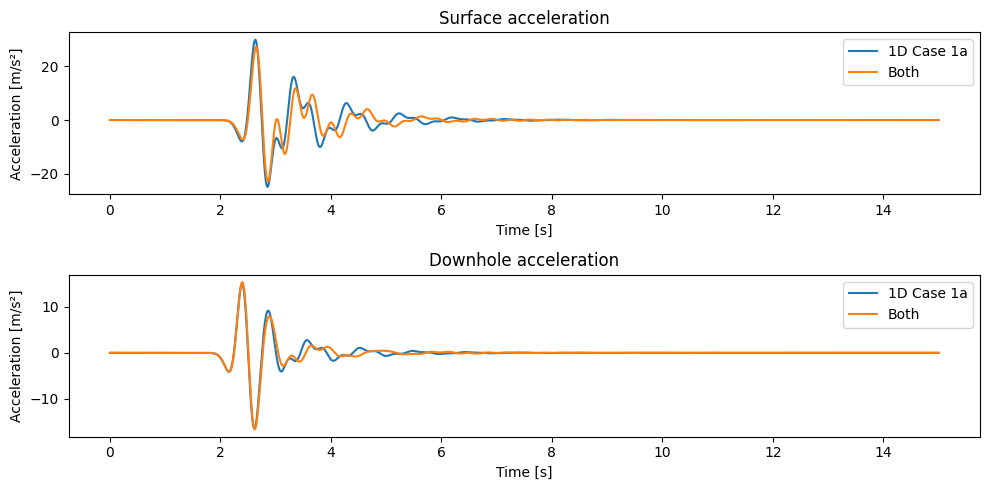

In [113]:
# Subfigures with accelerations

fig, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(surface_df['time'], surface_df['xacc'], label='1D Case 1a')
#ax[0].plot(surface_df_base['time'], surface_df_base['xacc'], label='Base')
#ax[0].plot(surface_df_base1D['time'], surface_df_base1D['xacc'], label='1D model', linestyle='--')
#ax[0].plot(surface_df_base['time'], surface_df_base['xacc'], label='2D model')
#ax[0].plot(surface_df_inter['time'], surface_df_inter['xacc'], label='Interlayer')
#ax[0].plot(surface_df_intra['time'], surface_df_intra['xacc'], label='Intralayer')  
ax[0].plot(surface_df_both['time'], surface_df_both['xacc'], label='Both')
ax[0].set_title('Surface acceleration')
ax[0].set_ylabel('Acceleration [m/s²]')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

ax[1].plot(downhole_df['time'], downhole_df['xacc'], label='1D Case 1a')
#ax[1].plot(downhole_df_base1D['time'], downhole_df_base1D['xacc'], label='1D model', linestyle='--')
#ax[1].plot(downhole_df_base['time'], downhole_df_base['xacc'], label='2D model')
#ax[1].plot(downhole_df_inter['time'], downhole_df_inter['xacc'], label='Interlayer')
#ax[1].plot(downhole_df_intra['time'], downhole_df_intra['xacc'], label='Intralayer')
ax[1].plot(downhole_df_both['time'], downhole_df_both['xacc'], label='Both')
ax[1].set_title('Downhole acceleration')
ax[1].set_ylabel('Acceleration [m/s²]')
ax[1].set_xlabel('Time [s]')
ax[1].legend()

plt.tight_layout()


In [114]:
## TF calculation
freq_df , TF_df = TTF.TTF(surface_df["xacc"].values, downhole_df["xacc"].values)
#freq_df_base1D , TF_df_base1D = TTF.TTF(surface_df_base1D["xacc"].values, downhole_df_base1D["xacc"].values)
#freq_df_base , TF_df_base = TTF.TTF(surface_df_base["xacc"].values, downhole_df_base["xacc"].values)
#freq_df_inter , TF_df_inter = TTF.TTF(surface_df_inter["xacc"].values, downhole_df_inter["xacc"].values)
#freq_df_intra , TF_df_intra = TTF.TTF(surface_df_intra["xacc"].values, downhole_df_intra["xacc"].values)
freq_df_both , TF_df_both = TTF.TTF(surface_df_both["xacc"].values, downhole_df_both["xacc"].values)

In [115]:
# Load pt values 
import pickle

# Load pickle
with open("./data from HLC 1D Soil_bedorck/Vs_values_1000.pt", "rb") as f:
    Vs_d_data = pickle.load(f)

with open("./data from HLC 1D Soil_bedorck/TTF_data_1000.pt", "rb") as f:
    TF_d_data = pickle.load(f)

Vs_d_data = np.array(Vs_d_data)
TF_d_data = np.array(TF_d_data)
# Is there a true in the index?
index = Vs_d_data[:,0] == Vs1
if np.any(index):
    Vs_d_data = Vs_d_data[index]
    TF_d_data = TF_d_data[index]


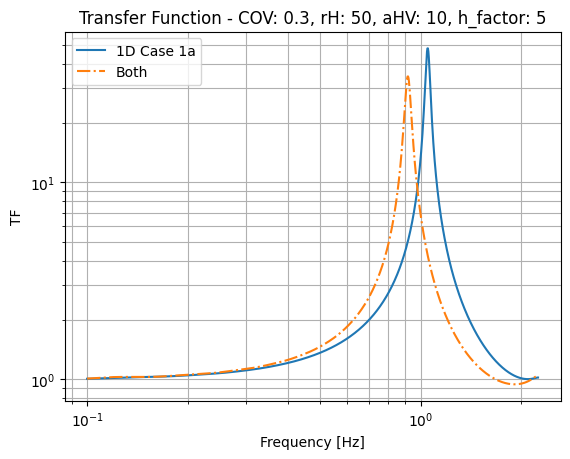

In [116]:


plt.loglog(freq_df, TF_df, label='1D Case 1a')
#plt.loglog(freq_df_base1D, TF_df_base1D, label='Base 1D', linestyle=':')
#plt.loglog(freq_df_base, TF_df_base, label='Base 2D', linestyle='--')
#plt.loglog(freq_df_inter, TF_df_inter, label='Interlayer')
#plt.loglog(freq_df_intra, TF_df_intra, label='Intralayer')
plt.loglog(freq_df_both, TF_df_both, label='Both', linestyle='-.')
plt.xlabel('Frequency [Hz]')
plt.ylabel('TF')
plt.legend()
plt.title(f'Transfer Function - COV: {COV}, rH: {rH}, aHV: {aHV}, h_factor: {h_factor}')
plt.grid(which="both")


Text(0, 0.5, 'Difference')

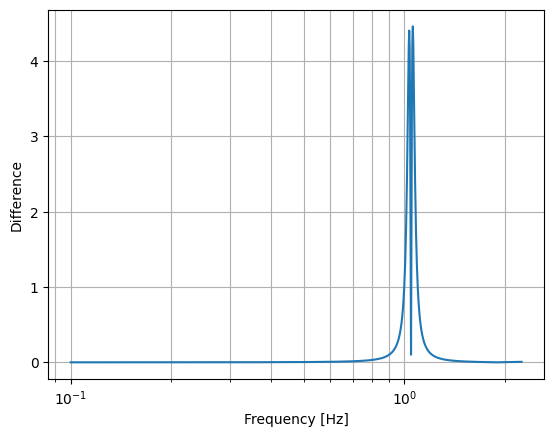

In [110]:
# difference
diff = np.abs(TF_df_base1D - TF_df)
plt.semilogx(freq_df, diff)
plt.grid(which='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Difference')